## 3주차 미션 소개 -  피처 엔지니어링(Feature Engineering)

* 피처 엔지니어링(Feature Engineering)은 머신러닝 모델을 훈련시키기 위해 입력 데이터로 사용되는 피처(또는 변수)들을 가공하거나 새로운 피처를 만들어내는 과정을 말합니다. 피처 엔지니어링은 머신러닝 성능을 향상시키고 모델의 일반화 성능을 향상시키는 데 핵심적인 역할을 합니다. 현실 세계의 데이터는 종종 불완전하고 노이즈가 많습니다. 결측값, 이상치, 오류 등이 있을 수 있습니다. 종속 변수와의 관계를 강화하고 모델이 더 나은 예측을 할 수 있도록 도와줍니다. 예를 들어, 특정 도메인 지식을 활용하여 새로운 피처를 생성하거나 기존 피처를 변형시켜 모델이 패턴을 더 잘 파악하도록 할 수 있습니다. 불필요한 피처를 제거하거나 피처를 효과적으로 변형함으로써 모델의 계산 효율성을 높일 수 있습니다. 이는 모델을 더 빠르게 훈련시키고 실행시킬 수 있습니다.

* 미션 데이터셋 소개

    * 해당 Kaggle 데이터셋( https://www.kaggle.com/blastchar/telco-customer-churn )은 통신사 고객 이탈(Churn)에 대한 정보를 담고 있습니다. IBM에서 제공한 이 데이터셋은 고객 유지에 필요한 행동을 예측하는 데 사용될 수 있으며, 고객 데이터를 분석하여 고객 유지 프로그램을 개발하는 데 도움이 됩니다.
    * 해당 데이터셋은 다음의 정보로 구성되어 있습니다.
        * 고객 인구 통계 정보(Demographic info): 고객의 성별, 연령대, 배우자 및 부양 가족의 유무(Gender, SeniorCitizen, Partner, Dependents) 등에 관한 정보가 포함되어 있습니다.
        * 고객 이탈(Churn) 정보: 서비스를 중단 여부에 대한 정보가 포함되어 있습니다.
        * 서비스 가입 정보(Services subscribed): 고객들이 가입한 서비스들, 예를 들어 전화, 다중 라인, 인터넷, 온라인 보안, 온라인 백업, 장치 보호, 기술 지원, 스트리밍 TV 및 영화( honeService, MultipleLine, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies) 등에 대한 정보가 있습니다.
        * 고객 계정 정보(Customer account info): 고객이 얼마나 오래 서비스를 이용했는지, 계약 유형, 결제 방법, 무페이퍼 청구 여부, 월별 요금, 총 요금 (CustomerID, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Tenure)등의 정보가 담겨 있습니다.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 미션 수행을 위해 데이터셋을 로드합니다.
df = pd.read_csv("https://bit.ly/telco-csv", index_col="customerID")
df.shape

(7043, 20)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# TotalCharges 가 수치 타입이 아니기 때문에 수치 연산을 위해 숫자 형태로 변경합니다.
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [ ]:
df = df.dropna()

## 미션 1) - 수치형 변수를 범주형 변수로 만들기

* 월별 지불 금액을 그룹화하여 지불 금액 구간별 경향성을 분석할 수 있습니다. 이러한 수치형 데이터의 범주화는 수치형 데이터에 이상치가 있을 경우, 이를 구간화함으로써 이상치의 영향을 줄일 수 있습니다. 범주화된 데이터는 일반적으로 이해하기 쉽습니다. 그리고 모델이 특정 수치에 과도하게 적합되는 것을 방지할 수 있습니다. 수치형 데이터를 구간으로 나눔으로써 모델이 데이터의 일반적인 패턴을 학습하는 데 집중하도록 할 수 있습니다. 범주화된 데이터는 시각화 및 보고서 작성 시 직관적이고 명확한 정보 전달이 가능합니다. 데이터의 분포, 추세 등을 파악하기에 용이합니다. 데이터의 분포가 불균일할 때, 구간화를 통해 각 범주 내 데이터의 분포를 보다 균일하게 만들 수 있습니다. 위와 같은 이유로 수치형 변수를 범주화 하는 미션을 진행해 보겠습니다.

* 수치형 변수를 범주형 변수로 변환합니다.
* MonthlyCharges 를 4개의 구간으로 나눕니다. 구간을 나누는 기준은 시각화 내용을 바탕으로 정하며 기준에 대한 정답이 있지는 않습니다. 구간을 정한 기준을 설명으로 작성하고 구간을 나누는 코드를 작성해 주세요.

* 다음과 같이 원본과 구간을 나눈 데이터를 비교해 주세요. 기준이 정해져 있지 않으며 정답이 없으니 자율적으로 나눠 보세요.

| customerID   |   MonthlyCharges | monthlycharges_group   |
|:-------------|-----------------:|:-----------------------|
| 7590-VHVEG   |            29.85 | 0-30                   |
| 5575-GNVDE   |            56.95 | 30-70                  |
| 3668-QPYBK   |            53.85 | 30-70                  |
| 7795-CFOCW   |            42.3  | 30-70                  |
| 9237-HQITU   |            70.7  | 70-99                  |

<table>
    <tr>
        <td><img src="https://i.imgur.com/Tiub25Z.png" width="300"></td>
        <td><img src="https://i.imgur.com/7iGsGPB.png" width="300"></td>
    </tr>
</table>

### 1.1 전체 수치형 변수 Plot

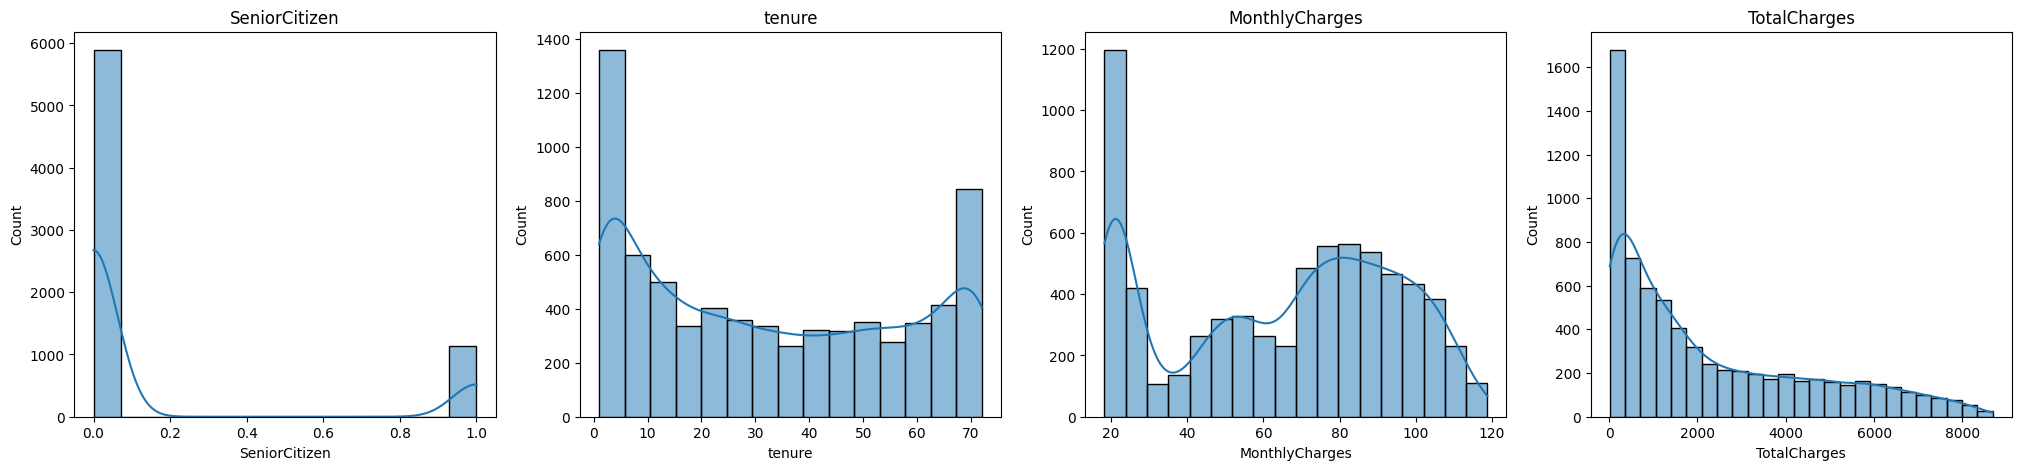

In [ ]:
## 수치형 변수 컬럼명을 뽑아낸 후 Plot
num_columns = df.select_dtypes(include="number").columns

f, ax = plt.subplots(1,4, figsize = (25,5))

for col in range(4):
    sns.histplot(df, x= num_columns[col], kde = True, ax = ax[col])
    ax[col].set_title(num_columns[col])
plt.show()

* SeniorCitizen feature는 수치형(int)의 데이터 타입을 갖고 있지만, 범주형 변수의 성격을 갖고 있기 때문에 범주화는 진행하지 않음.

### 1.2 tenure

#### 1.2.1 tenure 데이터 확인

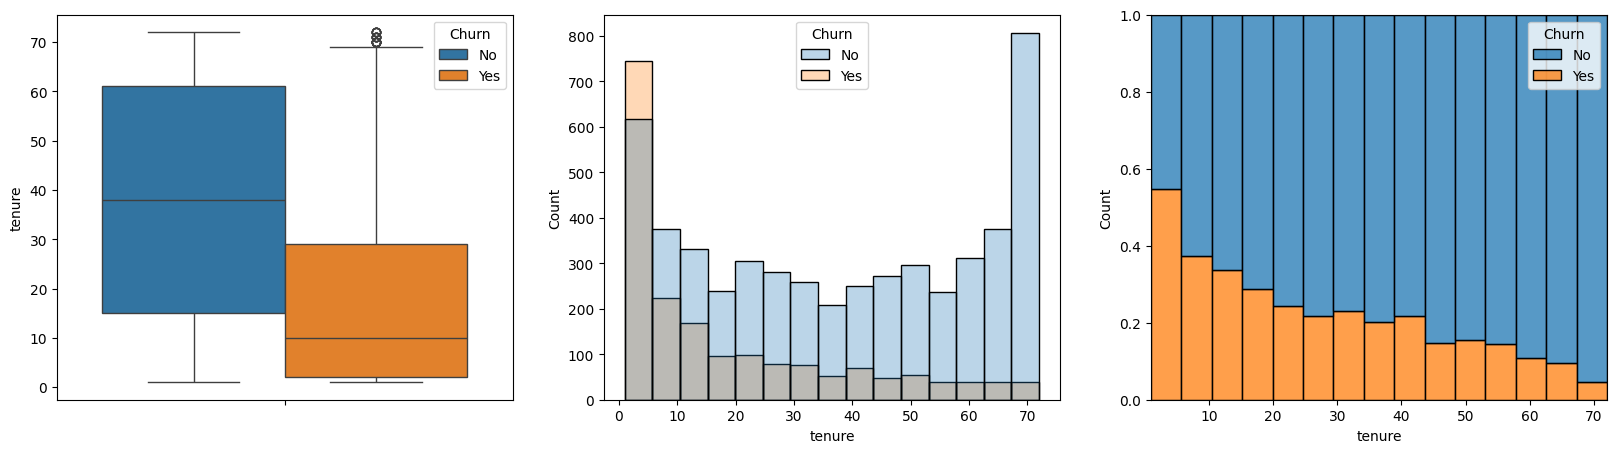

In [ ]:
# tenure feature의 분포 확인
f, ax = plt.subplots(1,3, figsize=(20,5))
sns.boxplot(y=df['tenure'], hue = df['Churn'], ax=ax[0])
sns.histplot(df, x= 'tenure', hue = 'Churn', ax = ax[1], alpha = 0.3)
sns.histplot(df, x= 'tenure', hue = 'Churn', multiple = 'fill', ax=ax[2])
plt.show()

In [ ]:
# tenure와 Churn간의 관계 확인을 위한 Churn feature를 벡터화
## 이탈하는 경우를 1로 설정
df2 = df.copy()
df2['Churn_num'] = 0
df2['Churn_num'][df2['Churn'] == 'Yes'] = 1
df2[['Churn','Churn_num']].head()

,Churn,Churn_num
customerID,,
7590-VHVEG,No,0
5575-GNVDE,No,0
3668-QPYBK,Yes,1
7795-CFOCW,No,0
9237-HQITU,Yes,1


In [ ]:
# tenure와 Churn간의 상관 관계
df2[['Churn_num', 'tenure']].corr()

,Churn_num,tenure
Churn_num,1.000000,-0.354049
tenure,-0.354049,1.000000


* 이탈률을 가입기간(tenure)에 따라 plot을 하면, 가입기간이 짧을수록 이탈자의 수와 이탈률이 높음을 확인할 수 있음.
* Churn feature를 벡터화하여 가입 기간과의 상관관계를 확인하면, 음의 상관관계를 보임
* tenure feature는 Churn에 영향을 줄 수 있는 변수로 볼수 있으며, 이러한 경향이 잘 나타날 수 있도록 범주화하는 것일 필요함.

#### 1.2.2 tenure 변수 범주화

In [ ]:
df['tenure'].describe()

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [ ]:
df['tenure'][df['Churn']=='Yes'].describe()

count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: tenure, dtype: float64

* 데이터의 분포를 기반으로 여러 범주화의 구간으로 나누어 보고, 성능을 확인하여 최적의 범주화 구간 수를 정하고자 함.
* 범주화 구간 수

    1) 2개 구간
    
    : Boxplot에서 관찰한 결과를 기반으로 이탈 고객의 3분위 수에 해당하는 tenure로 구간을 나눔.
    
    (구간1: tenure < 29, 구간2: tenure >=29)

    2) 3개 구간

    : histplot에서 관찰한 결과를 기반으로 이탈률 높음, 중간, 낮음으로 구간을 나눔.

    (높음: 1-15, 중간: 15-45, 낮음: 45-72)

    3) 4개 구간

    :  histplot에서 관찰한 결과를 기반으로 이탈률 높음, 중간, 낮음, 매우 낮음으로 구간을 나눔.

    (높음: 1-20, 중간: 20-45, 낮음: 45-55, 매우 낮음: 55-72)

    4) 5개 구간
    
     :  histplot에서 관찰한 결과를 기반으로 이탈률 매우 높음, 높음, 중간, 낮음, 매우 낮음으로 구간을 나눔.

    (매우 높음: 1-9, 높음: 9-29, 중간: 20-45, 낮음: 45-55, 매우 낮음: 55-72)

In [ ]:
# 함수 정의

## 범주 구간에 따른 범주화 컬럼 생성 함수
def num_to_cat(df, column, div_range):
    '''
    수치형 변수는 주어진 구간(div range)을 이용하여 범주화하는 함수

    div_range: 범주화 구간값 리스트
    '''
    df[column+'_cat'] = 0
    for i, v in enumerate(div_range):
        df[column+'_cat'][df[column] >= v] = i+1
    return df

## 범주 구간 후, 플롯 생성 함수
def num_to_cat_plot(df, num_col, cat_col):
    '''
    수치형 변수를 범주화 한 후, plot하여 비교하는 함수

    num_col: 수치형 컬럼 (범주화 이전)
    cat_col: 범주형 컬럼 (범주화 이후)
    '''
    fig, ax = plt.subplots(1,3, figsize = (20,5))
    sns.histplot(df, x= num_col, kde = True, ax = ax[0])
    sns.countplot(df, x = cat_col,  ax = ax[1])
    sns.countplot(df, x = cat_col, hue = 'Churn',  ax = ax[2])

## 바이너리 변수 인코딩 함수 (1주차 과제 코드 사용)
### 수치형 변수의 범주화 과제 진행을 위해 간단한 범주화만 사용

def binary_encoding(df):
    '''
    범주형 변수 중 gender, Partner, Dependents, PhoneSerive, PaperlessBilling을
    인코딩하는 함수
    '''
    df_bin = df.copy()
    df_bin["gender_encode"] = (df_bin["gender"] == "Male").astype(int)
    df_bin["Partner_encode"] = (df_bin["Partner"] == "Yes").astype(int)
    df_bin["Dependents_encode"] = (df_bin["Dependents"] == "Yes").astype(int)
    df_bin["PhoneService_encode"] = (df_bin["PhoneService"] == "Yes").astype(int)
    df_bin["PaperlessBilling_encode"] = (df_bin["PaperlessBilling"] == "Yes").astype(int)
    return df_bin

## 범주 구간에 따른 accuracy 확인을 위한 함수 정의
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def accuracy_test(df, col = None, type = 'num'):
    '''
    dataframe을 입력받아서 accuracy를 구하는 함수
    '''
    df_acc = df.copy()
    # 삭제할 컬럼이 있는 경우
    if col != None:
        df_acc = df_acc.drop(col, axis = 1)
    # 수치형 변수 범주화 과정에서는 범주형 변수 one-hot-encoding없이 진행하기 위해
    # 1주차 과제 참고한 코드 사용
    if type == 'num':
        df_acc = binary_encoding(df_acc)
        feature_names = df_acc.select_dtypes(include="number").columns
    # 범주형 변수 one-hot-encoding 변환 과정에서는 모든 변수 사용
    # feature name은 label을 제외한 컬럼명 저장
    else:
        feature_names = list(df_acc.columns)
        feature_names.remove('Churn')
    X = df_acc[feature_names]
    y = df_acc['Churn']
    # train과 test set 분리
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 0)
    # 의사결정트리 알고리즘 사용
    dtc = DecisionTreeClassifier(max_depth = 5, max_features = 0.9, random_state = 0)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    acc = accuracy_score(y_test, pred)
    return acc

In [ ]:
# 수치형 범수를 변환없이 그대로 사용 (범주 구간 1개)
accuracy_ten = []
print('범주화 없는 경우 정확도(Accuracy)',+ accuracy_test(df, None))
accuracy_ten.append(accuracy_test(df, None))

범주화 없는 경우 정확도(Accuracy) 0.7896233120113717


범주 구간 2개의 정확도(Accuracy) 0.7846481876332623


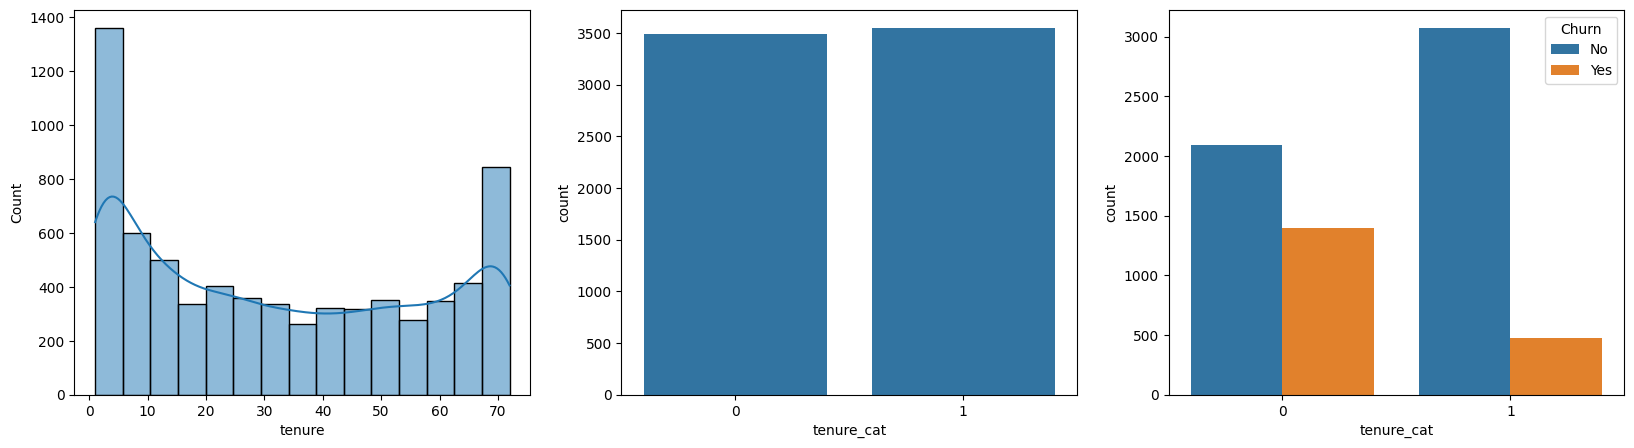

In [ ]:
# 범주 구간 2개
df_tenure = df.copy()
df_tenure_1 = num_to_cat(df_tenure, 'tenure', [29])
num_to_cat_plot(df_tenure_1, 'tenure', 'tenure_cat')
print('범주 구간 2개의 정확도(Accuracy)',+ accuracy_test(df_tenure_1, 'tenure'))
accuracy_ten.append(accuracy_test(df_tenure_1, 'tenure'))

범주 구간 3개의 정확도(Accuracy) 0.7931769722814499


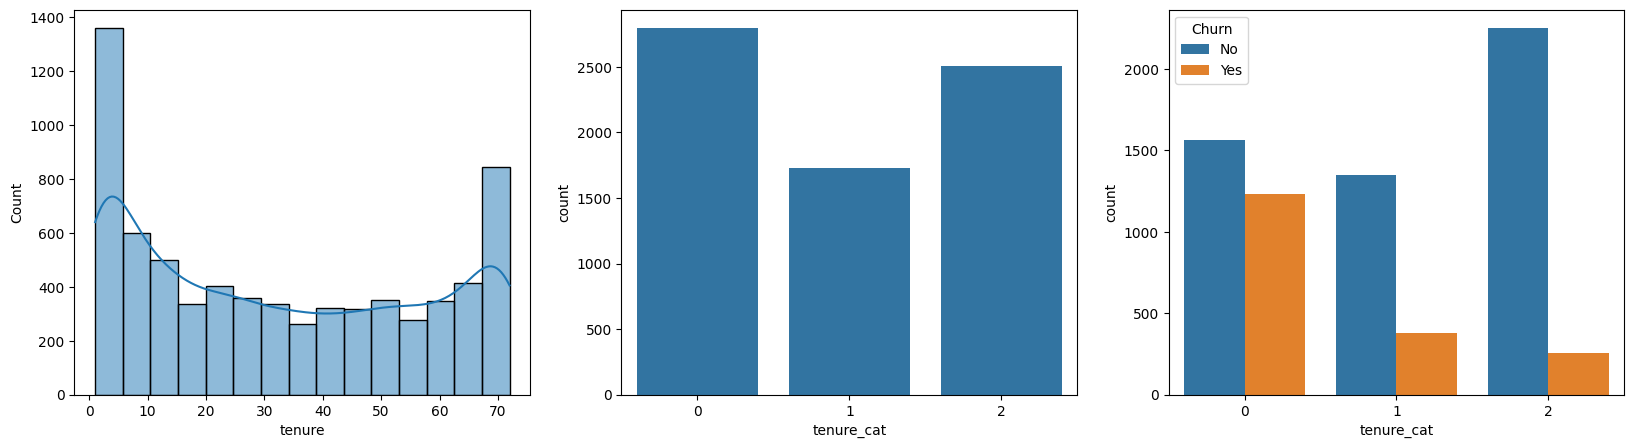

In [ ]:
# 범주 구간 3개
df_tenure = df.copy()
df_tenure_2 = num_to_cat(df_tenure, 'tenure', [20, 45])
num_to_cat_plot(df_tenure_2, 'tenure', 'tenure_cat')
print('범주 구간 3개의 정확도(Accuracy)',+ accuracy_test(df_tenure_2, 'tenure'))
accuracy_ten.append(accuracy_test(df_tenure_2, 'tenure'))

범주 구간 4개의 정확도(Accuracy) 0.7903340440653873


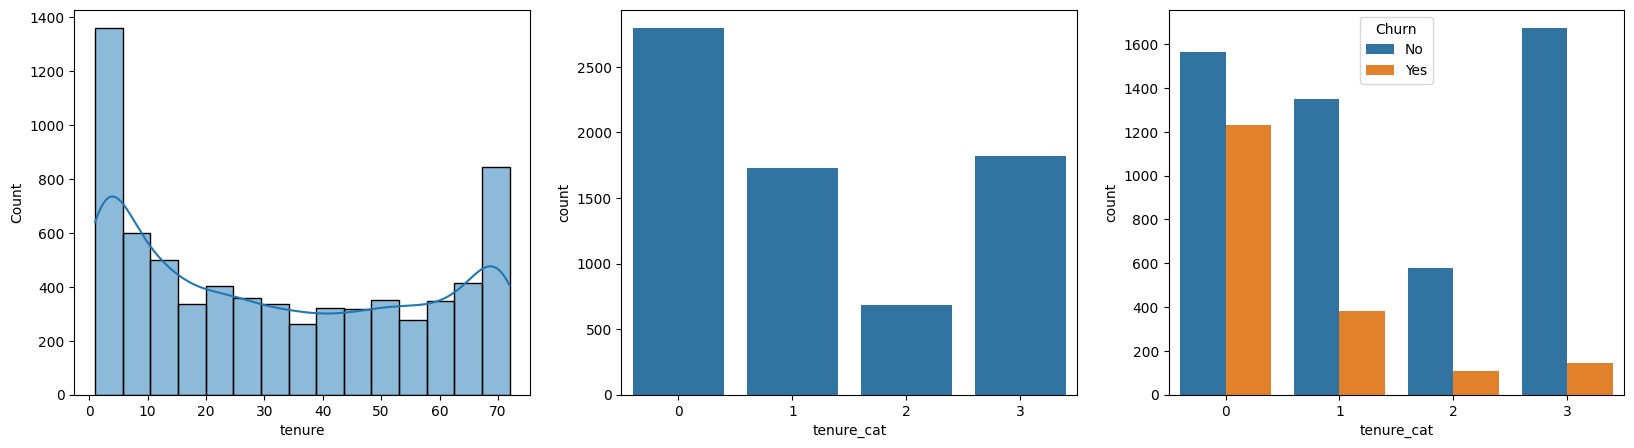

In [ ]:
# 범주 구간 4개
df_tenure = df.copy()
df_tenure_3 = num_to_cat(df_tenure, 'tenure', [20, 45, 55])
num_to_cat_plot(df_tenure_3, 'tenure', 'tenure_cat')
print('범주 구간 4개의 정확도(Accuracy)',+ accuracy_test(df_tenure_3, 'tenure'))
accuracy_ten.append(accuracy_test(df_tenure_3, 'tenure'))

범주 구간 5개의 정확도(Accuracy) 0.783226723525231


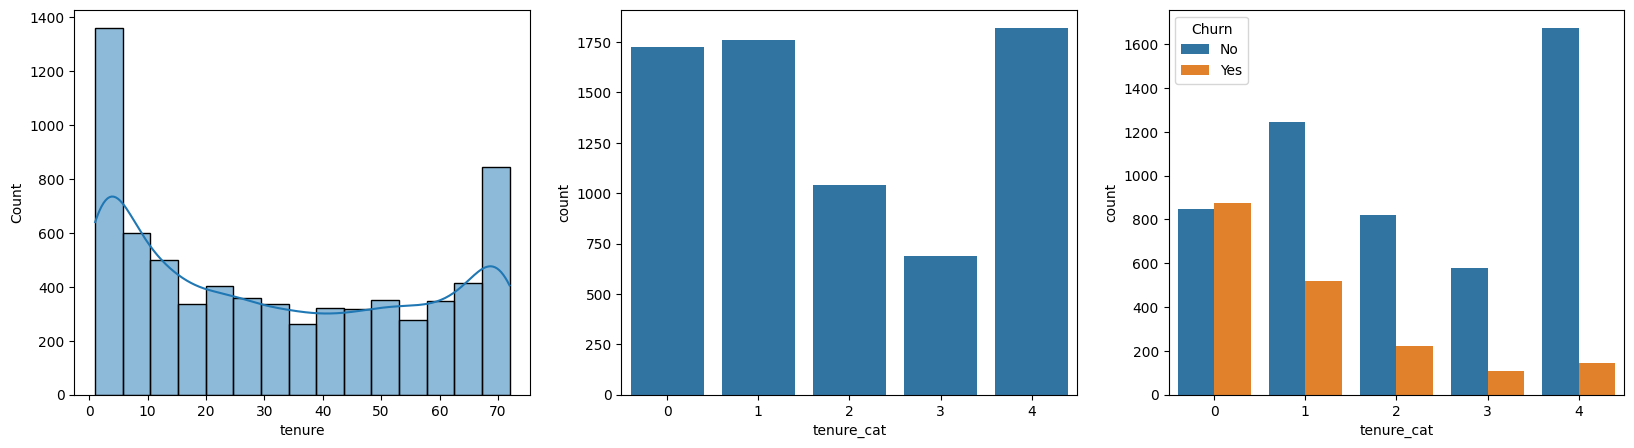

In [ ]:
# 범주 구간 5개
df_tenure = df.copy()
df_tenure_4 = num_to_cat(df_tenure, 'tenure', [9, 29, 45, 55])
num_to_cat_plot(df_tenure_4, 'tenure', 'tenure_cat')
print('범주 구간 5개의 정확도(Accuracy)',+ accuracy_test(df_tenure_4, 'tenure'))
accuracy_ten.append(accuracy_test(df_tenure_4, 'tenure'))

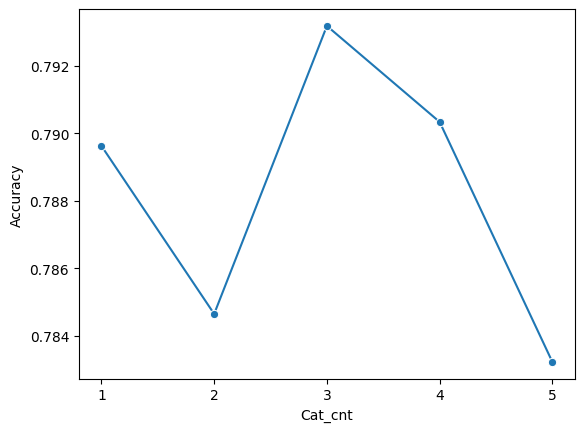

In [ ]:
# 구간 수에 따른 정확도
sns.lineplot(x = [1,2,3,4,5], y= accuracy_ten, marker='o')
plt.xticks([1,2,3,4,5])
plt.xlabel('Cat_cnt')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# 구간 수에 따른 상관관계
print('<범주화 구간 0 (수치형 변수)>')
print(df2[['Churn_num', 'tenure']].corr())

df_tenure_1_2 = df_tenure_1.copy()
df_tenure_1_2['Churn_num'] = 0
df_tenure_1_2['Churn_num'][df_tenure_1_2['Churn'] == 'Yes'] = 1
print('<범주화 구간 2>')
print(df_tenure_1_2[['Churn_num', 'tenure_cat']].corr())


df_tenure_2_2 = df_tenure_2.copy()
df_tenure_2_2['Churn_num'] = 0
df_tenure_2_2['Churn_num'][df_tenure_2_2['Churn'] == 'Yes'] = 1
print('<범주화 구간 3>')
print(df_tenure_2_2[['Churn_num', 'tenure_cat']].corr())

<범주화 구간 0 (수치형 변수)>
           Churn_num    tenure
Churn_num   1.000000 -0.354049
tenure     -0.354049  1.000000
<범주화 구간 2>
            Churn_num  tenure_cat
Churn_num    1.000000   -0.300987
tenure_cat  -0.300987    1.000000
<범주화 구간 3>
            Churn_num  tenure_cat
Churn_num    1.000000   -0.334752
tenure_cat  -0.334752    1.000000


**결과 해석:**

* tenure feature를 3개의 구간으로 나눈 경우 구간을 지정하지 않거나, 2개 또는 4~5개의 구간보다 높은 정확도를 보임.
* 2개의 구간에서 3개의 구간으로 늘어나면서 이탈자의 수/이탈률에 대한 설명이 명확해 진것으로 보임.
* 4개의 구간에서는 이탈하지 않는 가입자의 구간을 세분화하였고,5개의 구간에서는 초기 이탈자의 수가 많은 구간을 세분화하였는데 그로 인해이탈자에 대한 경향이 약해진 것이 정확도 감소의 원인일 것으로 추측함.

### 1.3 MonthlyCharges

#### 1.3.1 MonthlyCharges 데이터 확인

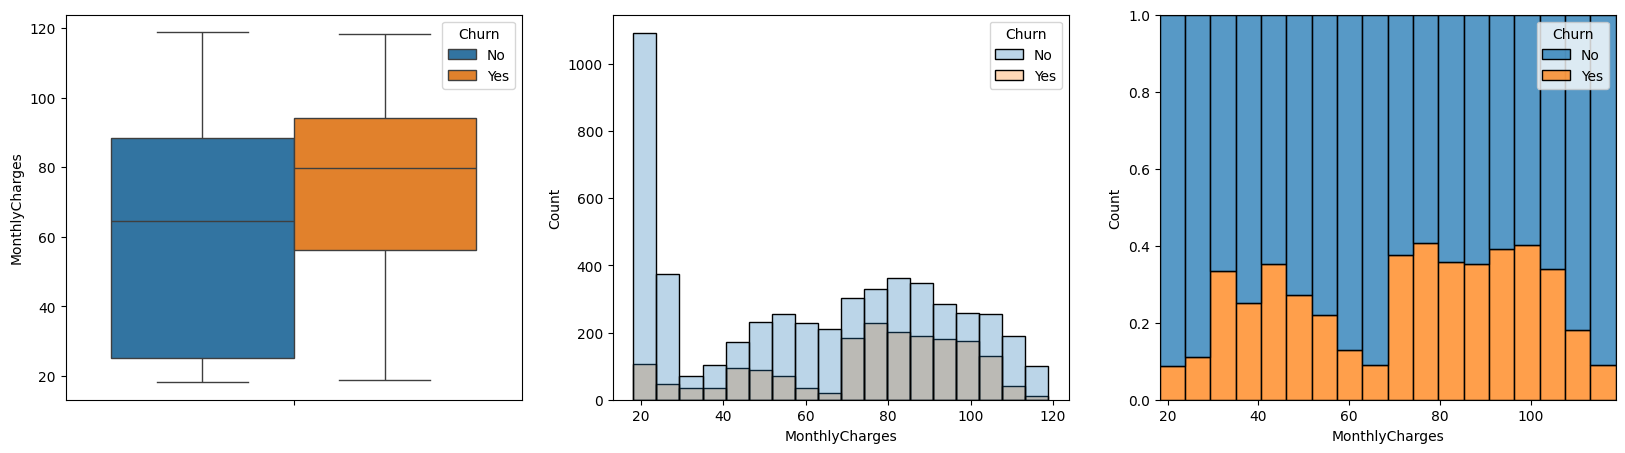

In [ ]:
# MonthlyCharges feature의 분포 확인
f, ax = plt.subplots(1,3, figsize=(20,5))
sns.boxplot(y=df['MonthlyCharges'], hue = df['Churn'], ax=ax[0])
sns.histplot(df, x= 'MonthlyCharges', hue = 'Churn', ax = ax[1], alpha = 0.3)
sns.histplot(df, x= 'MonthlyCharges', hue = 'Churn', multiple = 'fill', ax=ax[2])
plt.show()

In [ ]:
# MonthlyCharges Churn간의 상관 관계
df2[['Churn_num', 'MonthlyCharges']].corr()

,Churn_num,MonthlyCharges
Churn_num,1.000000,0.192858
MonthlyCharges,0.192858,1.000000


* 이탈자 수는 월 요금(MonthlyCharges)에 따라 plot을 하면, 월요금이 낮은 경우 가장 적음.
* tenure와는 다르게 한 방향으로 나타나는 경향은 없음.
* 이탈률은 특정 구간(30-50, 70-110)에서 높게 나타남.
* Churn feature를 벡터화하여 총 요금과의 상관관계를 확인하면, 양의 상관관계를 보임

#### 1.3.2 MonthlyCharges 변수 범주화

In [ ]:
df['MonthlyCharges'].describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

데이터의 분포를 기반으로 여러 범주화의 구간으로 나누어 보고, 성능을 확인하여 최적의 범주화 구간 수를 정하고자 함.

범주화 구간 수

1) 2개 구간

: histplot에서 관찰한 결과를 기반으로 이탈자 수가 많음, 적음으로 구간을 나눔.

(적음: MonthlyCharges< 70, 많음: MonthlyCharges>=70)

2) 3개 구간

: histplot에서 관찰한 결과를 기반으로 이탈자 수가 증가하는 시점을 기준으로 나눔.

(구간1: < 40, 구간2: 40-70, 구간3: >= 70)

3) 4개 구간

: 예제와 동일한 구간 사용

(구간 1: < 30, 구간 2: 30-70, 구간 3: 70-99, 구간 4: >=99)

4) 5개 구간

: 이탈률을 기준으로 이탈률이 적은 구간과 많은 구간을 세부적으로 나눔.
(구간 1: < 30, 구간 2: 30-50, 구간 3: 50-70, 구간 4: 70-110, 구간 5: >110)

In [ ]:
# 수치형 범수를 변환없이 그대로 사용 (범주 구간 1개)
accuracy_mon = []
print('범주화 없는 경우 정확도(Accuracy)',+ accuracy_test(df))
accuracy_mon.append(accuracy_test(df))

범주화 없는 경우 정확도(Accuracy) 0.7896233120113717


범주 구간 2개의 정확도(Accuracy) 0.7931769722814499


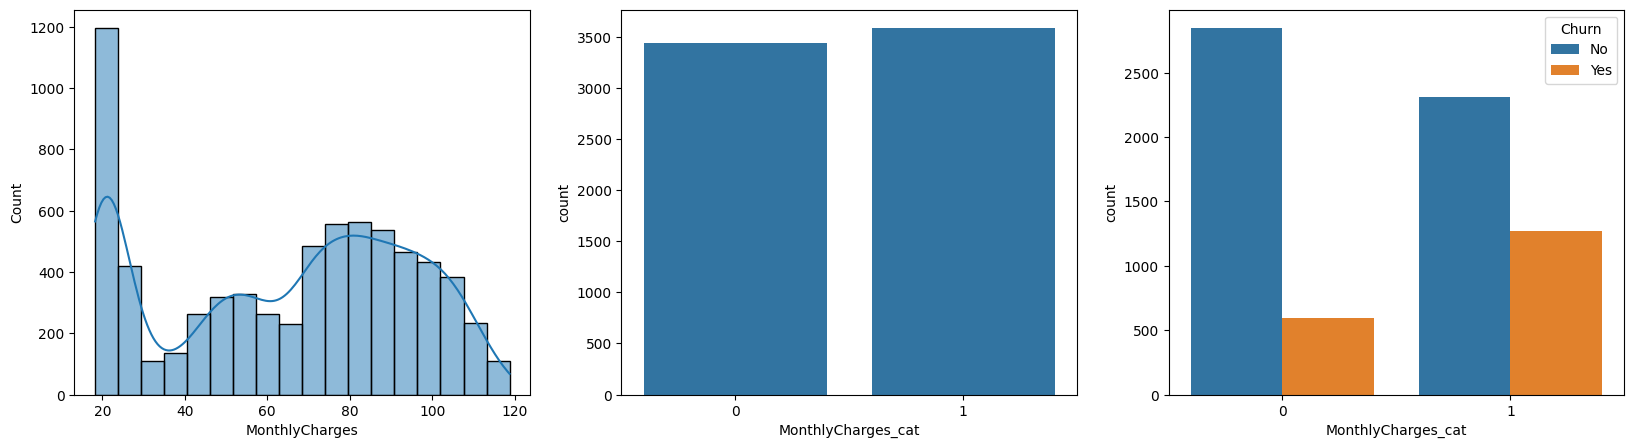

In [ ]:
# 범주 구간 2개
df_mon = df.copy()
df_mon_1 = num_to_cat(df_mon, 'MonthlyCharges', [70])
num_to_cat_plot(df_mon_1, 'MonthlyCharges', 'MonthlyCharges_cat')
print('범주 구간 2개의 정확도(Accuracy)',+ accuracy_test(df_mon_1, 'MonthlyCharges'))
accuracy_mon.append(accuracy_test(df_mon_1, 'MonthlyCharges'))

범주 구간 3개의 정확도(Accuracy) 0.7867803837953091


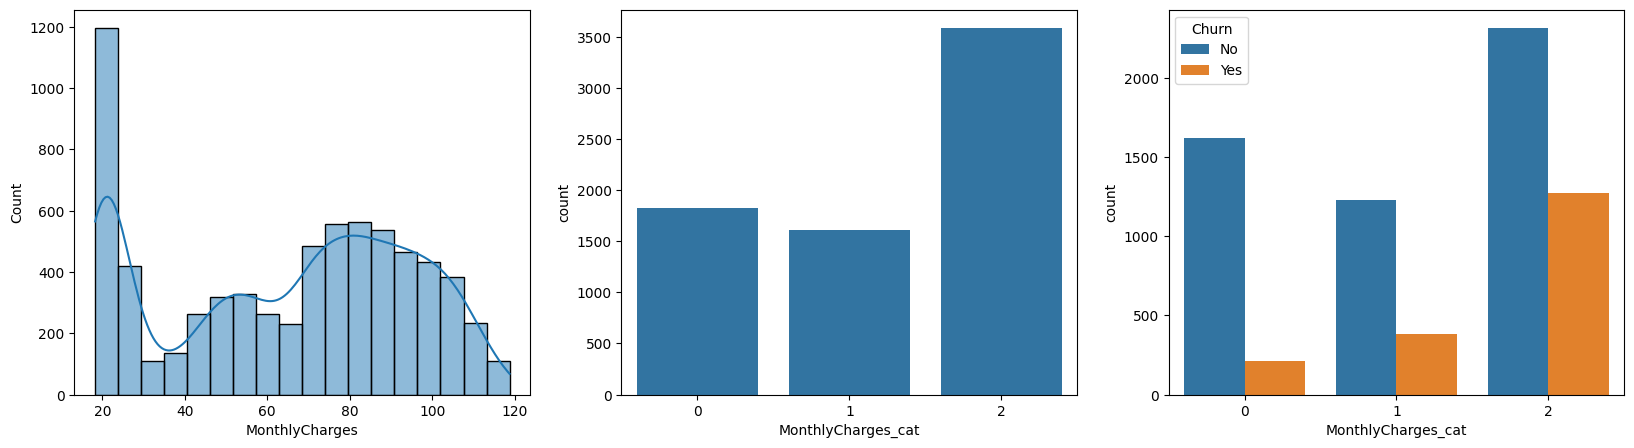

In [ ]:
# 범주 구간 3개
df_mon = df.copy()
df_mon_2 = num_to_cat(df_mon, 'MonthlyCharges', [40, 70])
num_to_cat_plot(df_mon_2, 'MonthlyCharges', 'MonthlyCharges_cat')
print('범주 구간 3개의 정확도(Accuracy)',+ accuracy_test(df_mon_2, 'MonthlyCharges'))
accuracy_mon.append(accuracy_test(df_mon_2, 'MonthlyCharges'))

범주 구간 4개의 정확도(Accuracy) 0.7896233120113717


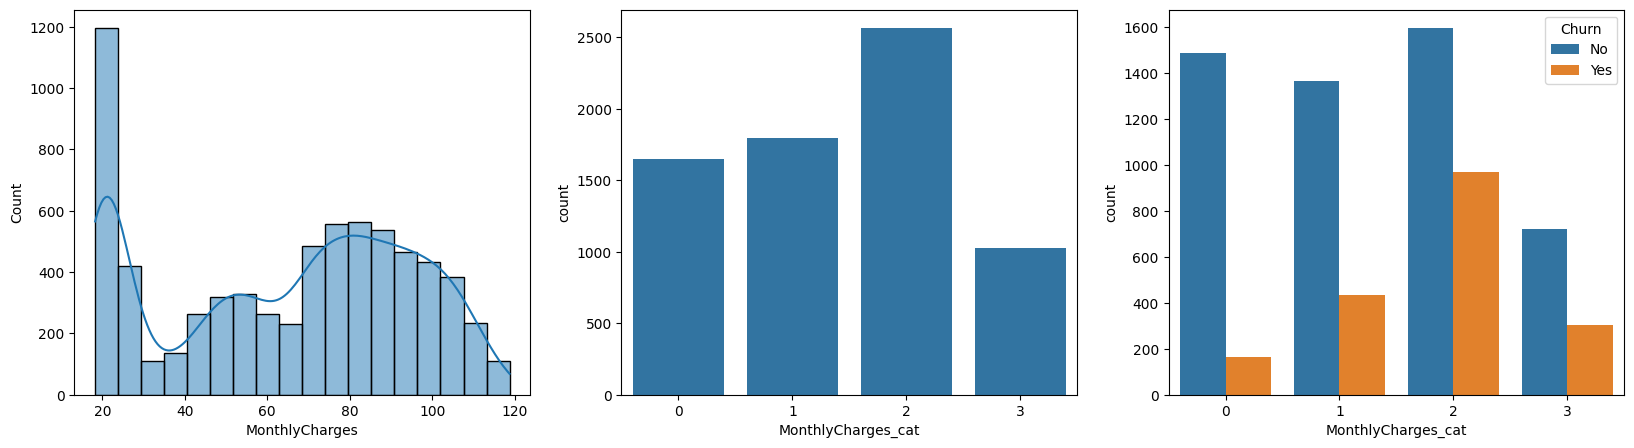

In [ ]:
# 범주 구간 4개
df_mon = df.copy()
df_mon_3 = num_to_cat(df_mon, 'MonthlyCharges', [30, 70, 99])
num_to_cat_plot(df_mon_3, 'MonthlyCharges', 'MonthlyCharges_cat')
print('범주 구간 4개의 정확도(Accuracy)',+ accuracy_test(df_mon_3, 'MonthlyCharges'))
accuracy_mon.append(accuracy_test(df_mon_3, 'MonthlyCharges'))

범주 구간 4개의 정확도(Accuracy) 0.7903340440653873


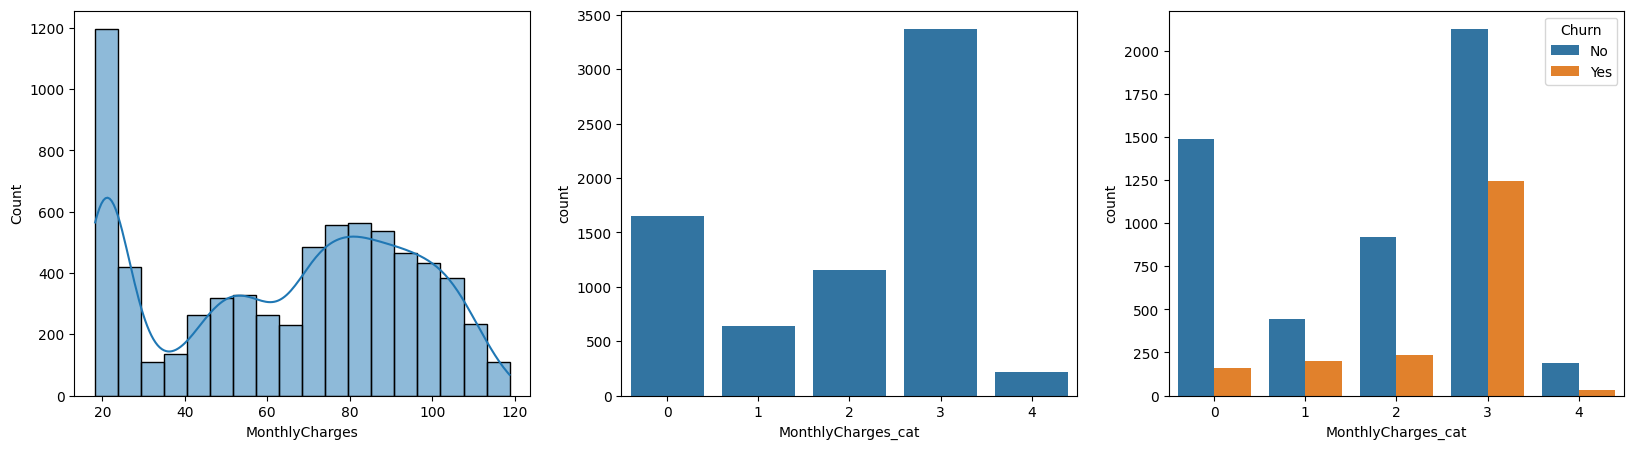

In [ ]:
# 범주 구간 5개
df_mon = df.copy()
df_mon_4 = num_to_cat(df_mon, 'MonthlyCharges', [30, 50, 70, 110])
num_to_cat_plot(df_mon_4, 'MonthlyCharges', 'MonthlyCharges_cat')
print('범주 구간 4개의 정확도(Accuracy)',+ accuracy_test(df_mon_4, 'MonthlyCharges'))
accuracy_mon.append(accuracy_test(df_mon_4, 'MonthlyCharges'))

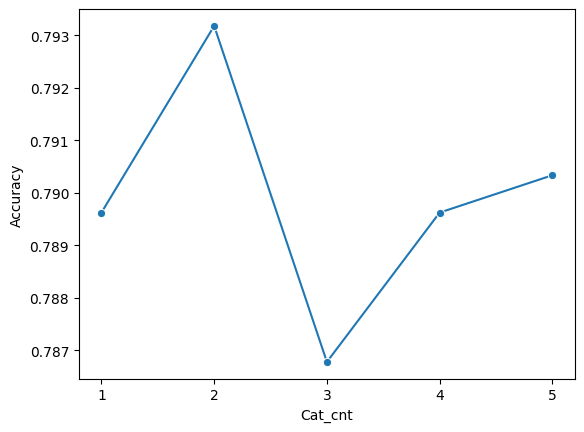

In [ ]:
# 구간 수에 따른 정확도
sns.lineplot(x = [1,2,3,4,5], y= accuracy_mon, marker='o')
plt.xticks([1,2,3,4,5])
plt.xlabel('Cat_cnt')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# 구간 수에 따른 상관관계
print('<범주화 구간 0 (수치형 변수)>')
print(df2[['Churn_num', 'MonthlyCharges']].corr())

df_mon_1_2 = df_mon_1.copy()
df_mon_1_2['Churn_num'] = 0
df_mon_1_2['Churn_num'][df_mon_1_2['Churn'] == 'Yes'] = 1
print('<범주화 구간 2>')
print(df_mon_1_2[['Churn_num', 'MonthlyCharges_cat']].corr())


df_mon_3_2 = df_mon_3.copy()
df_mon_3_2['Churn_num'] = 0
df_mon_3_2['Churn_num'][df_mon_3_2['Churn'] == 'Yes'] = 1
print('<범주화 구간 3>')
print(df_mon_3_2[['Churn_num', 'MonthlyCharges_cat']].corr())

<범주화 구간 0 (수치형 변수)>
                Churn_num  MonthlyCharges
Churn_num        1.000000        0.192858
MonthlyCharges   0.192858        1.000000
<범주화 구간 2>
                    Churn_num  MonthlyCharges_cat
Churn_num            1.000000            0.206134
MonthlyCharges_cat   0.206134            1.000000
<범주화 구간 3>
                    Churn_num  MonthlyCharges_cat
Churn_num            1.000000            0.202025
MonthlyCharges_cat   0.202025            1.000000


**결과 해석:**

* MonthlyCharges feature를 2개의 구간으로 나눈 경우 다른 구간수보다 높은 정확도를 보임.
* MonthlyCharges의 경우, tenure와 다르게 한쪽 방향으로 나타는 경향이 없지만, 평균 이탈률이 낮은 구간과 평균 이탈률이 높은 구간으로 나눈 것이 이탈자에 대한 설명도를 높힌 것으로 생각됨.
* 구간의 수를 4,5개로 늘리면서 정확도가 개선되는 경향이나, 구간의 수가 증가하는 것이 좋은 방향은 아닐 것으로 생각됨.

### 1.4 TotalCharges

#### 1.4.1 TotalCharges 데이터 확인

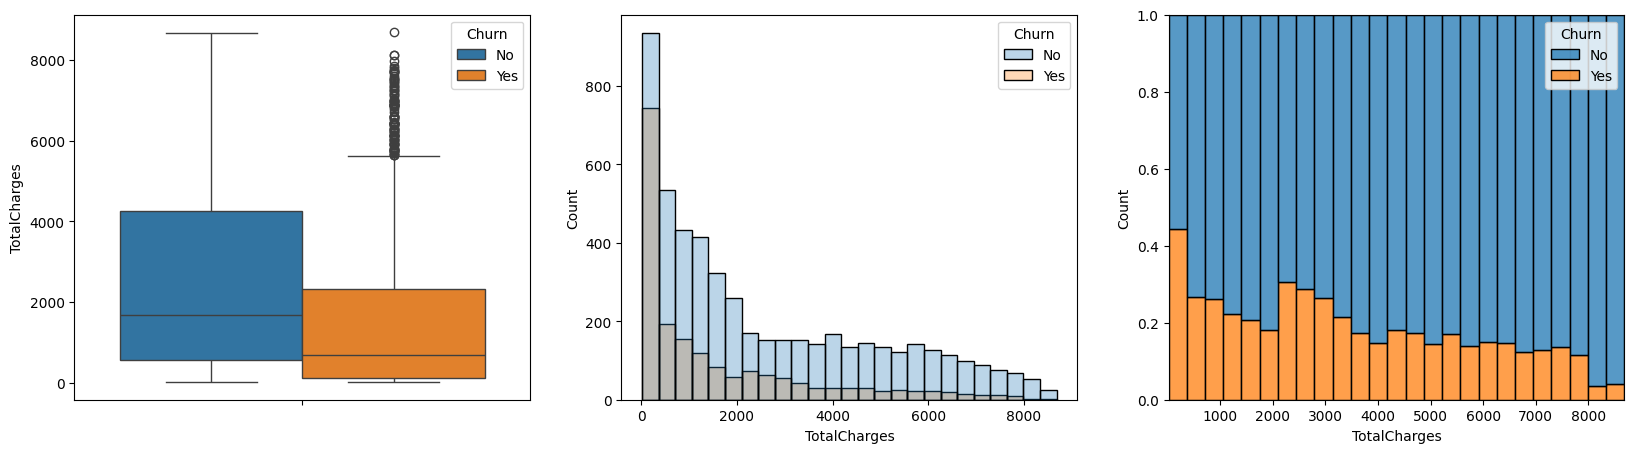

In [ ]:
# TotalCharges feature의 분포 확인
f, ax = plt.subplots(1,3, figsize=(20,5))
sns.boxplot(y=df['TotalCharges'], hue = df['Churn'], ax=ax[0])
sns.histplot(df, x= 'TotalCharges', hue = 'Churn', ax = ax[1], alpha = 0.3)
sns.histplot(df, x= 'TotalCharges', hue = 'Churn', multiple = 'fill', ax=ax[2])
plt.show()

In [ ]:
# MonthlyCharges Churn간의 상관 관계
df2[['Churn_num', 'TotalCharges']].corr()

,Churn_num,TotalCharges
Churn_num,1.000000,-0.199484
TotalCharges,-0.199484,1.000000


* 이탈자 수는 총 요금(TotalCharges)에 따라 plot을 하면, 총 요금이 증가하면서 감소하는 경향을 보임.하지만 이탈하지 않는 가입자의 수도 감소하는 경향임.
* 이탈률은 2000-3500 구간은 제외하면 전반적으로 감소하는 경향임
* Churn feature를 벡터화하여 가입 기간과의 상관관계를 확인하면, 음의 상관관계를 보임

#### 1.4.2 TotalCharges 변수 범주화

데이터의 분포를 기반으로 여러 범주화의 구간으로 나누어 보고, 성능을 확인하여 최적의 범주화 구간 수를 정하고자 함.

범주화 구간 수

1) 2개 구간

: boxplot에서 관찰한 결과를 기반으로 이탈자가 많은 구간과 적은 구간으로 나눔 (이탈자의 중앙값 사용)

(많음: < 700, 적음: >=2300)

2) 3개 구간

: 2개 구간 대비 이탈자가 적은 구간을 세분화하였음.
 (이탈자의 3분위수)

(구간1: < 700, 구간2: 200-2300, 구간3: >= 2300)

3) 4개 구간

: 3개 구간 대비 이탈자가 많은 구간은 세분화하였음.

(구간1: < 200, 구간2: 200-700, 구간3: 700-2300, 구간4: >= 2300)

In [ ]:
df[df['Churn']=='Yes']['TotalCharges'].describe()

count    1869.000000
mean     1531.796094
std      1890.822994
min        18.850000
25%       134.500000
50%       703.550000
75%      2331.300000
max      8684.800000
Name: TotalCharges, dtype: float64

In [ ]:
df[df['Churn']=='No']['TotalCharges'].describe()

count    5163.000000
mean     2555.344141
std      2329.456984
min        18.800000
25%       577.825000
50%      1683.600000
75%      4264.125000
max      8672.450000
Name: TotalCharges, dtype: float64

In [ ]:
# 수치형 범수를 변환없이 그대로 사용 (범주 구간 1개)
accuracy_tot = []
print('범주화 없는 경우 정확도(Accuracy)',+ accuracy_test(df, None))
accuracy_tot.append(accuracy_test(df, None))

범주화 없는 경우 정확도(Accuracy) 0.7896233120113717


범주 구간 2개의 정확도(Accuracy) 0.7903340440653873


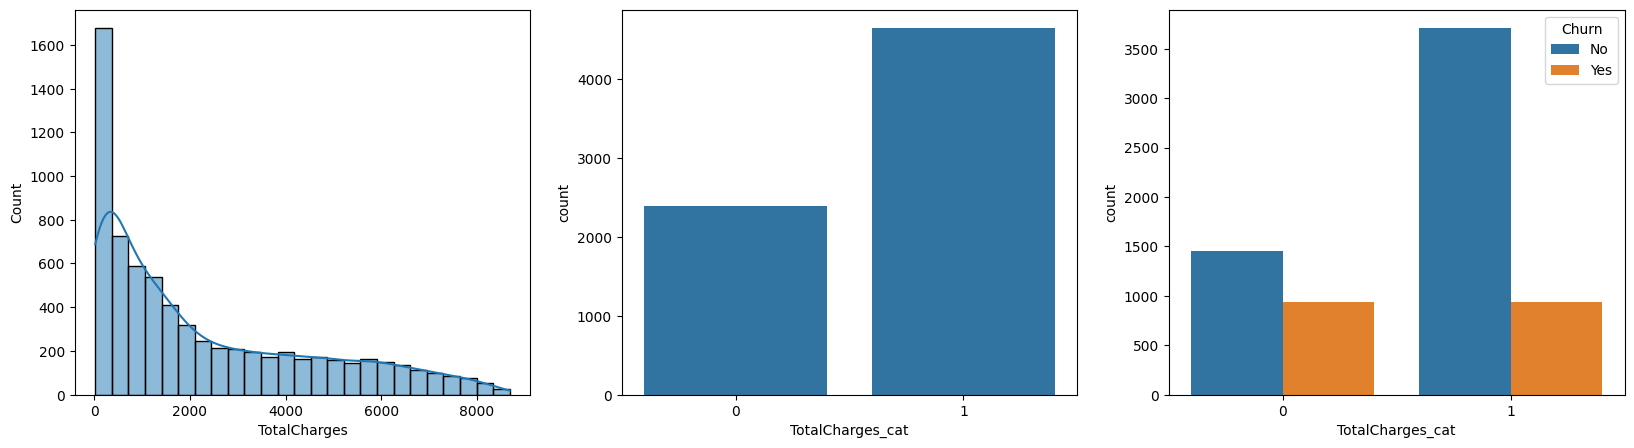

In [ ]:
# 범주 구간 2개
df_tot = df.copy()
df_tot_1 = num_to_cat(df_tot, 'TotalCharges', [700])
num_to_cat_plot(df_tot_1, 'TotalCharges', 'TotalCharges_cat')
print('범주 구간 2개의 정확도(Accuracy)',+ accuracy_test(df_tot_1, 'TotalCharges'))
accuracy_tot.append(accuracy_test(df_tot_1, 'TotalCharges'))

범주 구간 3개의 정확도(Accuracy) 0.7903340440653873


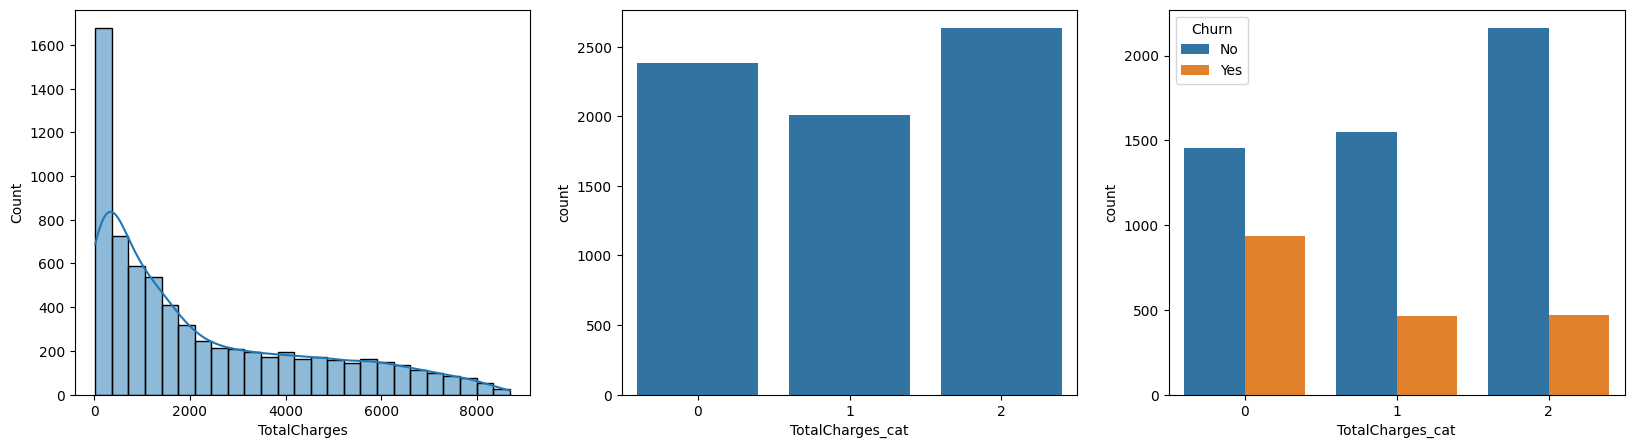

In [ ]:
# 범주 구간 3개
df_tot = df.copy()
df_tot_2 = num_to_cat(df_tot, 'TotalCharges', [700, 2300])
num_to_cat_plot(df_tot_2, 'TotalCharges', 'TotalCharges_cat')
print('범주 구간 3개의 정확도(Accuracy)',+ accuracy_test(df_tot_2, 'TotalCharges'))
accuracy_tot.append(accuracy_test(df_tot_2, 'TotalCharges'))

범주 구간 4개의 정확도(Accuracy) 0.7853589196872779


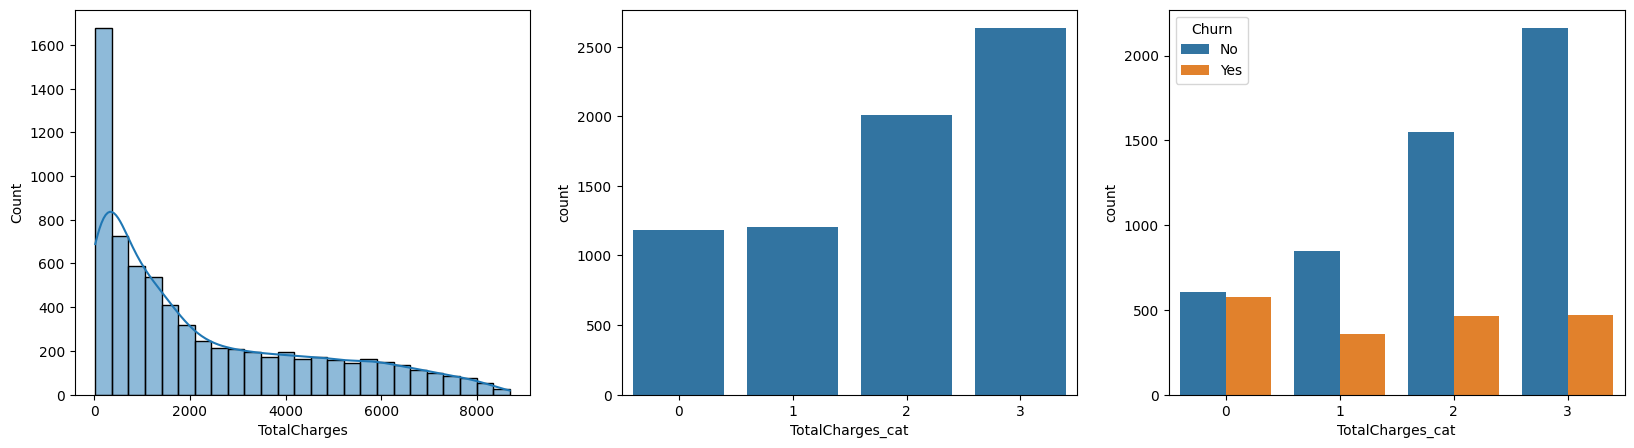

In [ ]:
# 범주 구간 4개
df_tot = df.copy()
df_tot_3 = num_to_cat(df_tot, 'TotalCharges', [200, 700, 2300])
num_to_cat_plot(df_tot_3, 'TotalCharges', 'TotalCharges_cat')
print('범주 구간 4개의 정확도(Accuracy)',+ accuracy_test(df_tot_3, 'TotalCharges'))
accuracy_tot.append(accuracy_test(df_tot_3, 'TotalCharges'))

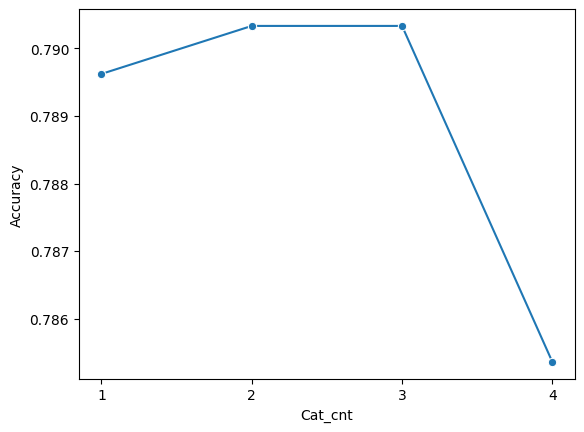

In [ ]:
# 구간 수에 따른 정확도
sns.lineplot(x = [1,2,3,4], y= accuracy_tot, marker='o')
plt.xticks([1,2,3,4])
plt.xlabel('Cat_cnt')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# 구간 수에 따른 상관관계
print('<범주화 구간 0 (수치형 변수)>')
print(df2[['Churn_num', 'TotalCharges']].corr())

df_tot_1_2 = df_tot_1.copy()
df_tot_1_2['Churn_num'] = 0
df_tot_1_2['Churn_num'][df_tot_1_2['Churn'] == 'Yes'] = 1
print('<범주화 구간 1>')
print(df_tot_1_2[['Churn_num', 'TotalCharges_cat']].corr())


df_tot_3_2 = df_tot_3.copy()
df_tot_3_2['Churn_num'] = 0
df_tot_3_2['Churn_num'][df_tot_3_2['Churn'] == 'Yes'] = 1
print('<범주화 구간 4>')
print(df_tot_3_2[['Churn_num', 'TotalCharges_cat']].corr())

<범주화 구간 0 (수치형 변수)>
              Churn_num  TotalCharges
Churn_num      1.000000     -0.199484
TotalCharges  -0.199484      1.000000
<범주화 구간 1>
                  Churn_num  TotalCharges_cat
Churn_num          1.000000         -0.203181
TotalCharges_cat  -0.203181          1.000000
<범주화 구간 4>
                  Churn_num  TotalCharges_cat
Churn_num          1.000000         -0.231331
TotalCharges_cat  -0.231331          1.000000


**결과 해석:**

* TotalCharges feature를 2~3개의 구간으로 나눈 경우 다른 구간수보다 높은 정확도를 보임.
* TotalCharges가 낮은 구간에서 급격하게 이탈자의 수나 비율이 감소하는 경향이 있는 지점을 기준으로 2개의 구간을 나눈 경우, Churn에 대한 설명도를 높힌 것으로 생각됨.
* 이탈자가 적은 구간을 세분화한 3개의 구간은 2개의 구간과 동등한 정확도를 보임. 이는 이탈자가 적은 구간을 세분화하는 것은 큰 의미가 없는 것으로 보임.

### 1.5 모든 수치형 변수 범주화

* tenure 5개 구간: [-20, 20-45, 45-]
* MonthlyCharges 4개 구간: [-70, 70-]
* TotalCharges 3개 구간: [-700, 700-]

In [ ]:
# 수치형 범수를 변환없이 그대로 사용 (범주 구간 1개)
accuracy_tot = []
print('범주화 없는 경우 정확도(Accuracy)',+ accuracy_test(df, None))
accuracy_tot.append(accuracy_test(df, None))

범주화 없는 경우 정확도(Accuracy) 0.7896233120113717


In [ ]:
df_num = df.copy()
df_num= num_to_cat(df_num, 'tenure', [29, 45])
df_num = num_to_cat(df_num, 'MonthlyCharges', [70])
df_num = num_to_cat(df_num, 'TotalCharges', [700])
print('수치형 변수 범주화 후 정확도(Accuracy)',+ accuracy_test(df_num, ['tenure','MonthlyCharges','TotalCharges']))

수치형 변수 범주화 후 정확도(Accuracy) 0.7796730632551528


**Summary:**
* 수치형 변수 범주화를 적용할 경우 적용하지 않은 경우보다 정확도가 0.790에서 0.780로 소폭 감소하였다.
* 수치형 변수를 범주화하는 것이 항상 성능에 좋은 영향을 끼치는 것은 아닌 것으로 보임.

    : 적절한 구간 선정 및 구간의 수, 범주화 여부 등이 영향을 줄 것으로 보임.

## 미션 2) - One-Hot-Encoding 하기

* One-Hot Encoding은 범주형 데이터를 머신러닝 모델이 이해할 수 있는 형태로 변환하는 기술 중 하나입니다. One-Hot Encoding을 사용하면 각 범주 간의 거리가 동일하게 유지됩니다. 즉, 범주 간의 유사성을 측정할 때 각 범주가 동일한 거리로 취급되므로 모델이 범주 간의 관계를 더 정확하게 학습할 수 있습니다. One-Hot Encoding은 범주의 수에 따라 적절한 차원을 생성하므로 데이터가 새로운 범주로 확장되거나 변할 때 모델이 쉽게 일반화될 수 있습니다. 각 범주가 독립된 차원으로 표현되므로, 모델의 예측이나 특성 중요도를 해석할 때 각 범주에 대한 기여를 명확하게 파악할 수 있습니다. 라벨 인코딩과 같은 다른 방법들이 범주 간의 임의의 순서를 생성할 수 있는 반면, One-hot encoding은 이러한 문제를 방지하고 모델이 데이터를 오해하는 것을 막습니다. 하지만, One-hot encoding은 범주의 수가 매우 많을 때 차원의 저주(curse of dimensionality)를 초래하거나, 데이터가 희소해질 수 있으므로 적용 시 이러한 점을 고려해야 합니다. 다음의 예시처럼 데이터를 One-Hot-Encoding 해주세요.

<img src="https://i.imgur.com/9Njm4aN.png">

| customerID   |   SeniorCitizen |   tenure |   TotalCharges |   gender_Female |   gender_Male |   Partner_No |   Partner_Yes |   Dependents_No |   Dependents_Yes |   PhoneService_No |
|:-------------|----------------:|---------:|---------------:|----------------:|--------------:|-------------:|--------------:|----------------:|-----------------:|------------------:|
| 7590-VHVEG   |               0 |        1 |          29.85 |               1 |             0 |            0 |             1 |               1 |                0 |                 1 |
| 5575-GNVDE   |               0 |       34 |        1889.5  |               0 |             1 |            1 |             0 |               1 |                0 |                 0 |
| 3668-QPYBK   |               0 |        2 |         108.15 |               0 |             1 |            1 |             0 |               1 |                0 |                 0 |
| 7795-CFOCW   |               0 |       45 |        1840.75 |               0 |             1 |            1 |             0 |               1 |                0 |                 1 |
| 9237-HQITU   |               0 |        2 |         151.65 |               1 |             0 |            1 |             0 |               1 |                0 |                 0 |


### 2.1 Feature별 category수 확인

In [ ]:
# 범주형 변수의 컬럼명
cat_columns = list(df.select_dtypes(include="object").columns)
cat_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [ ]:
# 각 변수의 범주 수 및 종류
for cat in cat_columns:
    print(f'{cat}: {len(set(df[cat]))}, ({set(df[cat])})')

gender: 2, ({'Female', 'Male'})
Partner: 2, ({'No', 'Yes'})
Dependents: 2, ({'No', 'Yes'})
PhoneService: 2, ({'No', 'Yes'})
MultipleLines: 3, ({'No', 'No phone service', 'Yes'})
InternetService: 3, ({'No', 'Fiber optic', 'DSL'})
OnlineSecurity: 3, ({'No', 'Yes', 'No internet service'})
OnlineBackup: 3, ({'No', 'Yes', 'No internet service'})
DeviceProtection: 3, ({'No', 'Yes', 'No internet service'})
TechSupport: 3, ({'No', 'Yes', 'No internet service'})
StreamingTV: 3, ({'No', 'Yes', 'No internet service'})
StreamingMovies: 3, ({'No', 'Yes', 'No internet service'})
Contract: 3, ({'Two year', 'One year', 'Month-to-month'})
PaperlessBilling: 2, ({'No', 'Yes'})
PaymentMethod: 4, ({'Bank transfer (automatic)', 'Mailed check', 'Credit card (automatic)', 'Electronic check'})
Churn: 2, ({'No', 'Yes'})


#### 2.1.1 모든 feature One-Hot-Encoding 하기

In [ ]:
df_num.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_cat,MonthlyCharges_cat,TotalCharges_cat
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,0,0
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,One year,No,Mailed check,56.95,1889.50,No,1,0,1
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,0,0
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,2,0,1
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,1,0


In [ ]:
# Label인 Churn을 제외한 나머지 컬럼을 One-Hot-Encoding
## 수치형 변수를 범주화한 df_num을 사용
df3 = df_num.copy()
## 범주화 되지 않은 수치형 컬럼인 'tenure', 'MonthlyCharges', 'TotalCharges' 제거
df3 = df3.drop(['tenure', 'MonthlyCharges', 'TotalCharges'], axis = 1)
## 범주형 컬럼을 pd.get_dummies 함수를 이용하여 one-hot-encoding 처리
df_cat1 = pd.get_dummies(df3, columns=cat_columns[:-1])
df_cat1.head()

,SeniorCitizen,Churn,tenure_cat,MonthlyCharges_cat,TotalCharges_cat,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,No,0,0,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
5575-GNVDE,0,No,1,0,1,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
3668-QPYBK,0,Yes,0,0,0,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
7795-CFOCW,0,No,2,0,1,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
9237-HQITU,0,Yes,0,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
# one-hot-encoding 후 컬럼명 목록
df_cat1.columns

Index(['SeniorCitizen', 'Churn', 'tenure_cat', 'MonthlyCharges_cat',
       'TotalCharges_cat', 'gender_Female', 'gender_Male', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       '

In [ ]:
# One-Hot-Encoding 적용 후 정확도 계산
accuracy_cat = []
print(f'One-Hot-Encoding 적용 전 feature 수: {df.shape[1]-1}') # Churn을 제외하기 위해 1을 빼줌
print(f'One-Hot-Encoding 적용 후 feature 수: {df_cat1.shape[1]-1}') # Churn을 제외하기 위해 1을 빼줌
print('모든 feature One-Hot-Encoding 적용 정확도 (Accuracy)',accuracy_test(df_cat1,None,'cat'))
accuracy_cat.append(round(accuracy_test(df_cat1,None,'cat'),3))

One-Hot-Encoding 적용 전 feature 수: 19
One-Hot-Encoding 적용 후 feature 수: 45
모든 feature One-Hot-Encoding 적용 정확도 (Accuracy) 0.7903340440653873


* One-Hot encoding 적용 전 컬럼 수는 19개이지만, One-Hot encoding 적용 후 45개의 컬럼으로 증가함.

#### 2.1.2 중복 feature 제거

* 3개의 범주로 구성되어 있는 변수

    1) MultipleLine: No phone service는 PhoneService 컬럼의 No와 동일한 index를 갖고 있음.

    -> MultipleLine_yes와 MultipleLine_no로 분리 가능 (3개 -> 2개)

    2) OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies는 모두 No internet service를 제거할 수 있음. (3개 -> 2개)

In [ ]:
# 중복 feature 제거 후 정확도 계산
## 중복 feature list
del_columns_list = ['MultipleLines_No phone service', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service',
                    'DeviceProtection_No internet service','TechSupport_No internet service',
                    'StreamingTV_No internet service', 'StreamingMovies_No internet service']
df_cat2 = df_cat1.copy()
df_cat2 = df_cat2.drop(del_columns_list, axis = 1)
print(f'중복 feature 제거 전 feature 수: {df_cat1.shape[1]-1}') # Churn을 제외하기 위해 1을 빼줌
print(f'중복 feature 제거 후 feature 수: {df_cat2.shape[1]-1}') # Churn을 제외하기 위해 1을 빼줌
print('모든 feature One-Hot-Encoding 적용 정확도 (Accuracy)',accuracy_test(df_cat2,None,'cat'))
accuracy_cat.append(round(accuracy_test(df_cat2,None,'cat'),3))

중복 feature 제거 전 feature 수: 45
중복 feature 제거 후 feature 수: 38
모든 feature One-Hot-Encoding 적용 정확도 (Accuracy) 0.7917555081734187


In [ ]:
df_cat2.columns

Index(['SeniorCitizen', 'Churn', 'tenure_cat', 'MonthlyCharges_cat',
       'TotalCharges_cat', 'gender_Female', 'gender_Male', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

* 중복 feature 제거 후, 정확도가 0.790에서 0.792로 소폭 상승함.

#### 2.1.3 불필요한 feature수 줄이기

* 2개의 feature로 분리된 feature는 1개의 feature로 줄이는 것이 가능함.

    - 예를 들어 gender_female, gender_male은 gender_female이 1인 경우는 여성, 0인 경우는 남성이 됨. 따라서 gender_male 컬럼은 제거할 수 있음.

* 이와 마찬가지로 3~4개의 feature로 분리된 feature도 1개씩 줄일 수 있음

    - Contract_One year, Contract_Two year가 모두 0인 경우는 Contract_Month-to-month인 경우를 의미함.

* 중복 컬럼을 제거한 df_cat2에서 불필요한 feature수를 줄여서 정확도를 확인.

In [ ]:
# feature수 줄인 후 정확도 계산
## 제거할 feature list
del_columns_list2 = ['gender_Male', 'Partner_No', 'Dependents_No', 'PhoneService_No', 'MultipleLines_No',
                     'InternetService_No', 'OnlineSecurity_No', 'OnlineBackup_No', 'DeviceProtection_No',
                     'TechSupport_No', 'StreamingTV_No', 'StreamingMovies_No', 'Contract_Month-to-month',
                     'PaperlessBilling_No','PaymentMethod_Mailed check']
df_cat3 = df_cat2.copy()
df_cat3 = df_cat3.drop(del_columns_list2, axis = 1)
print(f'불필요한 feature 제거 전 feature 수: {df_cat2.shape[1]-1}') # Churn을 제외하기 위해 1을 빼줌
print(f'불필요한 feature 제거 후 feature 수: {df_cat3.shape[1]-1}') # Churn을 제외하기 위해 1을 빼줌
print('모든 feature One-Hot-Encoding 적용 정확도 (Accuracy)',accuracy_test(df_cat3,None,'cat'))
accuracy_cat.append(round(accuracy_test(df_cat3,None,'cat'),3))

불필요한 feature 제거 전 feature 수: 38
불필요한 feature 제거 후 feature 수: 23
모든 feature One-Hot-Encoding 적용 정확도 (Accuracy) 0.7882018479033405


In [ ]:
df_cat3.columns

Index(['SeniorCitizen', 'Churn', 'tenure_cat', 'MonthlyCharges_cat',
       'TotalCharges_cat', 'gender_Female', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check'],
      dtype='object')

* 불필요한 feature 제거 후, 정확도가 0.792에서 0.788로 소폭 감소함.
* feature수도 중복 feature 제거와 불필요한 feature를 제거하여 처음 feature수인  19개와 근사 수준인 23개가 되었음.

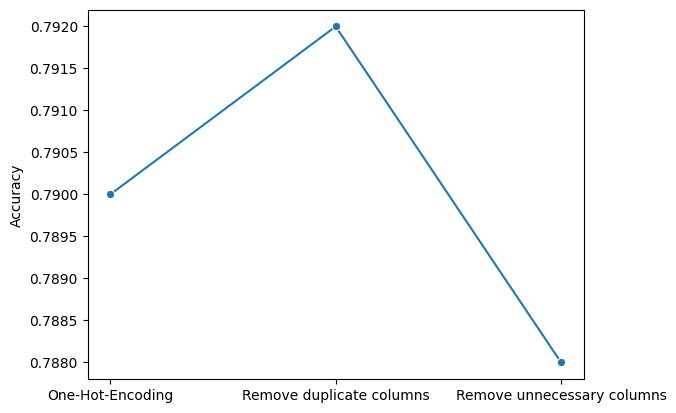

In [ ]:
sns.lineplot(x = [1,2,3], y = accuracy_cat, marker='o')
plt.xticks([1,2,3], labels =['One-Hot-Encoding', 'Remove duplicate columns', 'Remove unnecessary columns'])
plt.ylabel('Accuracy')
plt.show()

**Summary:**
* One-hot-Encoding을 한 후, 각각의 변수를 제거하는 방법으로 feature의 수를 줄이는 작업을 하였음.

* 중복이 되는 feature를 줄인 경우, 줄이지 않은 경우보다 소폭 정확도가 상승함.

* 반면 불필요한 feature들을 제거함으로써 feature의 수를 줄였으나, 정확도가 감소하는 결과를 보임.

    : feature 수를 과도하게 줄이는 것보다 적절한 feature를 제거하는 것이 성능 개선에 도움을 주는 것으로 보임.

## 미션 3) - 여러 피처 엔지니어링 기법을 적용하고 통신사 고객 이탈여부에 대한 모델의 성능을 Accuracy로 평가해 주세요.

* 이 미션은 데이터 전처리와 피처 엔지니어링의 중요성을 이해하고, 실제 비즈니스 문제에 적용할 수 있는 머신러닝 모델을 개발하는 데 중점을 둡니다. 통신사 고객 데이터를 활용하여 고객의 이탈 여부를 예측하는 머신러닝 모델을 개발하고, 여러 피처 엔지니어링 기법을 적용하여 모델의 정확도(Accuracy)를 높여보세요. 고객 이탈 여부 예측은 통신사에 있어 중요한 비즈니스 문제로, 고객 유지 전략 수립에 큰 영향을 미칩니다.

* 피처엔지니어링을 진행하고 모델의 성능을 평가합니다.
* 모델은 트리계열 모델 외 다른 모델을 사용해도 됩니다.


### 3.1 Feature Engineering

* 수치형 변수

    1) 수치형 변수를 범주화
    
    2) 표준화 처리(범주화 X)
    
    3) 표준화 처리 후 상관관계가 높은 tenure와 TotalCharges 중 tenure 제거

* 범주형 변수

    1) 범주형 변수를 One-hot-encoding 처리
    
    2) One-hot-encoding 처리 후, 중복 feature 제거
    
    3) 중복 feature 제거 후, 불필요한 feature를 제거

    : 총 9개의 case에 대해 모델의 성능을 평가해보고자 함.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# 수치형 변수 DataFrame
## 범주화 진행
X_num_to_cat = df_num[['tenure_cat', 'MonthlyCharges_cat','TotalCharges_cat']].copy()
## 범주화 하지 않음
X_num = df[['tenure', 'MonthlyCharges', 'TotalCharges']].copy()
MMS = MinMaxScaler()
MMS.fit(X_num)
X_num_scaled = MMS.transform(X_num)
X_num_scaled_df = pd.DataFrame(X_num_scaled, index = X_num.index, columns = ['tenure','MonthlyCharges','TotalCharges'])
## 범주화 하지 않은 데이터에서 tenure 컬럼 제거
X_num_scaled_df_2 =  X_num_scaled_df[['TotalCharges','MonthlyCharges']].copy()

# 범주형 변수 DataFrame
## One-hot encoding
X_cat_ohe1 = df_cat1.copy()
X_cat_ohe1 = X_cat_ohe1.drop(['tenure_cat', 'MonthlyCharges_cat','TotalCharges_cat', 'Churn'], axis = 1)
## 중복 feature 제거
X_cat_ohe2 = df_cat2.copy()
X_cat_ohe2 = X_cat_ohe2.drop(['tenure_cat', 'MonthlyCharges_cat','TotalCharges_cat', 'Churn'], axis = 1)
## 불필요 feature 제거
X_cat_ohe3 = df_cat3.copy()
X_cat_ohe3 = X_cat_ohe3.drop(['tenure_cat', 'MonthlyCharges_cat','TotalCharges_cat', 'Churn'], axis = 1)

<Axes: >

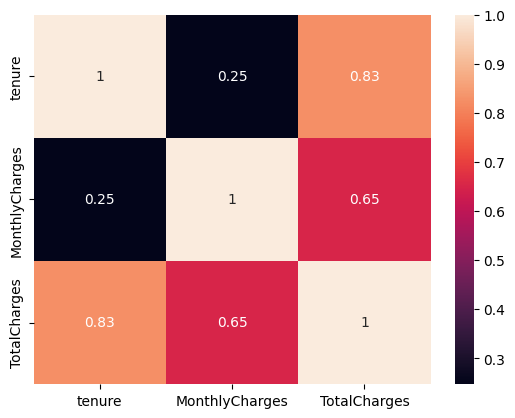

In [ ]:
sns.heatmap(X_num_scaled_df.corr(), annot = True)

* tenure와 TotalCharges의 상관계수가 0.826 수준으로 매우 높음. 다중공선성 문제로 인해 모델의 성능이 저하될 수 있음.

### 3.2 모델 성능 평가

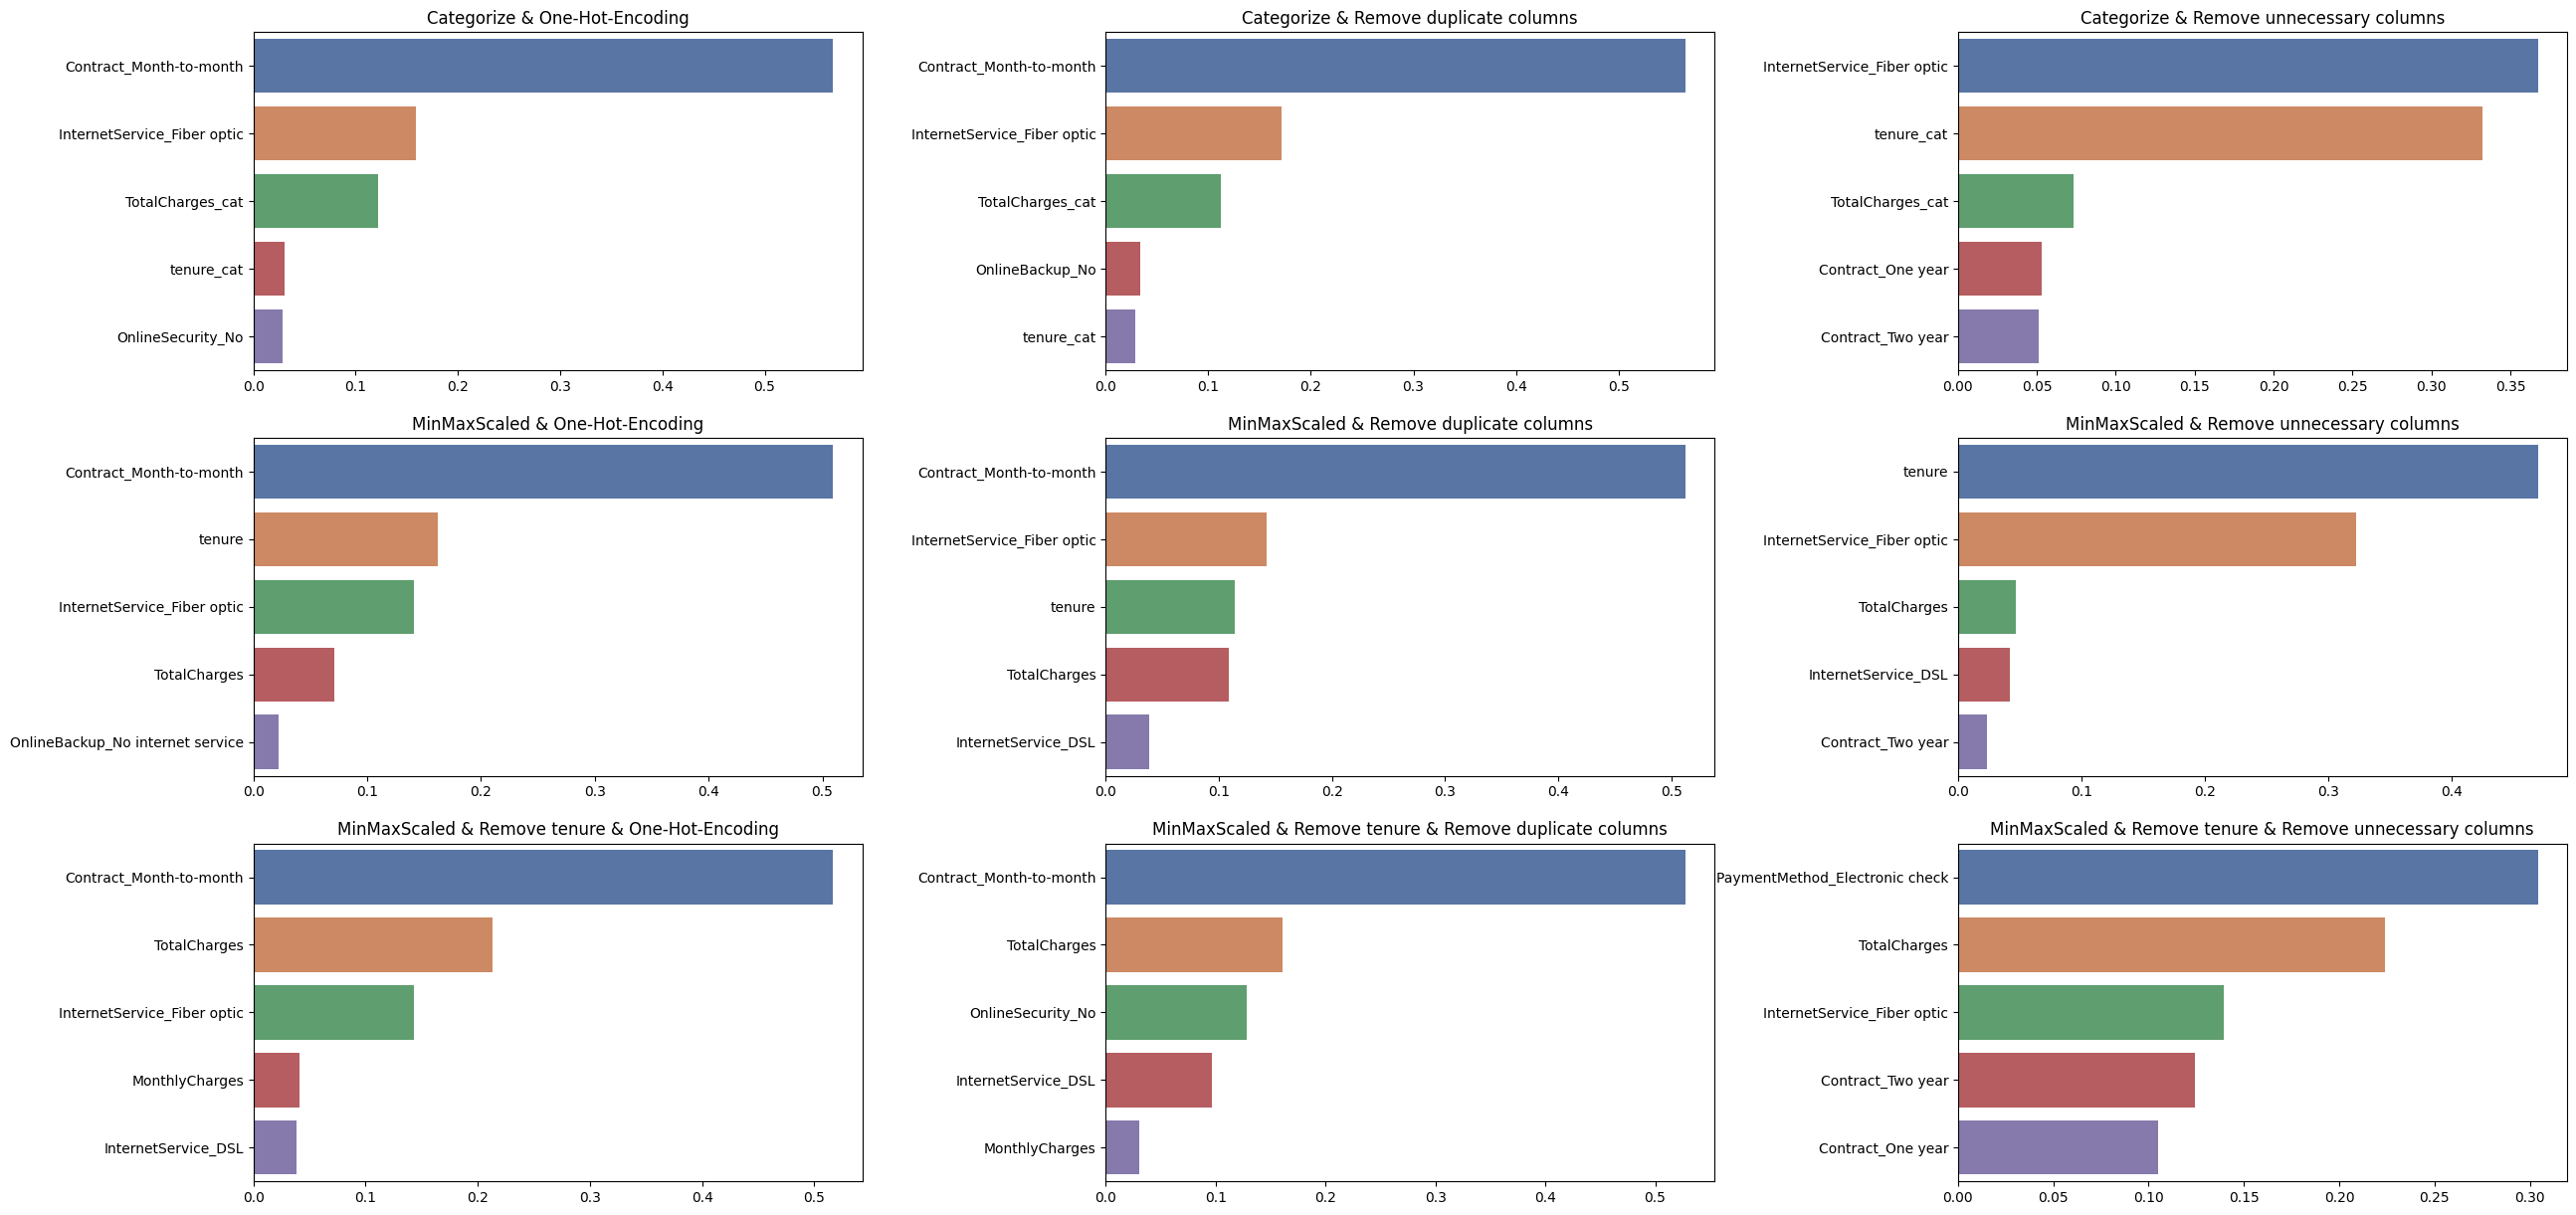

,수치형 변수 처리,범주형 변수 처리,정확도
0,Categorize,One-Hot-Encoding,0.790
1,Categorize,Remove duplicate columns,0.792
2,Categorize,Remove unnecessary columns,0.793
3,MinMaxScaled,One-Hot-Encoding,0.787
4,MinMaxScaled,Remove duplicate columns,0.790
5,MinMaxScaled,Remove unnecessary columns,0.791
6,MinMaxScaled & Remove tenure,One-Hot-Encoding,0.792
7,MinMaxScaled & Remove tenure,Remove duplicate columns,0.792
8,MinMaxScaled & Remove tenure,Remove unnecessary columns,0.801


In [ ]:
X_num_dict = {'Categorize': X_num_to_cat, 'MinMaxScaled': X_num_scaled_df, 'MinMaxScaled & Remove tenure': X_num_scaled_df_2}
X_cat_dict = {'One-Hot-Encoding':X_cat_ohe1, 'Remove duplicate columns': X_cat_ohe2, 'Remove unnecessary columns': X_cat_ohe3}
# 수치형 변수 처리 리스트
num_list = []
# 범주화 변수 처리 리스트
cat_list = []
# 정확도 결과 리스트
acc_list = []

f, ax = plt.subplots(3,3, figsize = (30,15))
i = -1
for k1, num_df in X_num_dict.items():
    i += 1
    j = -1
    for k2, cat_df in X_cat_dict.items():
        j += 1
        # 수치형 변수 df와 범주형 변수 df를 합쳐서 하나의 df로 변환
        X = pd.concat([num_df, cat_df], axis = 1)
        y = df['Churn']
        # 의사결정트리 알고리즘 적용
        model = DecisionTreeClassifier(max_depth = 5, max_features = 0.9, random_state = 0)
        X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, stratify=y, random_state=0)
        model.fit(X_train, y_train)
        pred = model.predict(X_test)

        # 수치형 변수 처리, 범주형 변수 처리, 정확도 결과값을 리스트에 추가
        num_list.append(k1)
        cat_list.append(k2)
        acc_list.append(round(accuracy_score(y_test, pred),3))

        # feature importance plot
        ## feature importance 중 높은 순위의 5개만 추출하여 plot
        indices = np.argsort(model.feature_importances_)[::-1][:5]
        sns.barplot(x = model.feature_importances_[indices], y = X_train.columns[indices], ax=ax[i,j],
                    palette = 'deep')
        ax[i,j].set_title(f'{k1} & {k2}')
        ax[i,j].set_ylabel('')

plt.subplots_adjust(wspace=0.4, hspace=0.2)
plt.show()

# 수치형 변수 처리, 범주형 변수 처리, 정확도 결과값을 포함하는 DataFrame 생성
result_dict = {'수치형 변수 처리': num_list, '범주형 변수 처리': cat_list, '정확도': acc_list}
result_df = pd.DataFrame(result_dict)
result_df

**Summary:**

* 범주형 변수를 One-hot encoding 후 중복 feature 제거, 불필요 feature 제거 과정을 통해 feature의 수를 줄이는 것이 정확도가 향상됨.

* 수치형 변수를 표준화 하는 것보다 범주화 하는 것이 성능 개선에 도움이 됨.

* 수치형 변수 중 상관관계가 높은 변수를 제거하는 것이 성능 개선에 도움이 됨.

* 각 faeture의 처리에 따라 feature importance가 다르게 나타남을 확인할 수 있음. 이러한 다른 importance가 모델의 성능 개선에 도움을 주는 것으로 보임.

### 3.3 다른 모델 적용

* 가장 성능이 좋았던 MinMaxScaled & Remove tenure와 Remove unnecessary columns을 데이터로 사용하여 각 모델에서의 최적 성능 확인

* 적용 모델

    1) AdaBoost

    2) RandomForest

    3) GradientBoosting

    4) SVM

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# 가장 성능이 좋았던 MinMaxScaled & Remove tenure와 Remove unnecessary columns을 데이터로 사용
random_state = 0
X = pd.concat([X_num_scaled_df_2, X_cat_ohe3], axis = 1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, stratify=y, random_state=random_state)


# Cross validation split 수
# 원본 데이터의 분포 유지를 위해 StratifiedKFold 사용
kfold = StratifiedKFold(n_splits = 5)

In [ ]:
# AdaBoostClassifier
dt = DecisionTreeClassifier()

ada = AdaBoostClassifier(dt, random_state = random_state)

## hyperparameter
ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

ada_gs = GridSearchCV(ada, param_grid= ada_param_grid, cv = kfold, scoring = 'accuracy', n_jobs = 4, verbose = 1)
ada_gs.fit(X_train, y_train)
print(f'AdaBoostClassifier의 최적 하이퍼파라미터: {ada_gs.best_params_}')
print(f'AdaBoostClassifier의 best score: {round(ada_gs.best_score_, 3)}')

Fitting 5 folds for each of 112 candidates, totalling 560 fits
AdaBoostClassifier의 최적 하이퍼파라미터: {'algorithm': 'SAMME.R', 'base_estimator__criterion': 'gini', 'base_estimator__splitter': 'best', 'learning_rate': 1.5, 'n_estimators': 2}
AdaBoostClassifier의 best score: 0.757


In [ ]:
# RandomForestClassifier
rf = RandomForestClassifier()

## hyperparameter
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

rf_gs = GridSearchCV(rf,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
rf_gs.fit(X_train,y_train)
print(f'RandomForestClassifier의 최적 파라미터: {rf_gs.best_params_}')
print(f'RandomForestClassifier의 best score: {rf_gs.best_score_}')

Fitting 5 folds for each of 54 candidates, totalling 270 fits
RandomForestClassifier의 최적 파라미터: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 100}
RandomForestClassifier의 best score: 0.7968


In [ ]:
# GradientBoostingClassifier
gb = GradientBoostingClassifier()

## hyperparameter
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1]
              }

gb_gs = GridSearchCV(gb,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gb_gs.fit(X_train,y_train)

print(f'GradientBoostingClassifier의 최적 파라미터: {gb_gs.best_params_}')
print(f'GradientBoostingClassifier의 best score: {gb_gs.best_score_}')

Fitting 5 folds for each of 72 candidates, totalling 360 fits
GradientBoostingClassifier의 최적 파라미터: {'learning_rate': 0.05, 'loss': 'deviance', 'max_depth': 4, 'max_features': 0.3, 'min_samples_leaf': 100, 'n_estimators': 200}
GradientBoostingClassifier의 best score: 0.8026666666666668


In [ ]:
# SVM
svc = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'],
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

svc_gs = GridSearchCV(svc,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

svc_gs.fit(X_train,y_train)

print(f'SVC의 최적 파라미터: {svc_gs.best_params_}')
print(f'SVC의 best score: {svc_gs.best_score_}')

Fitting 5 folds for each of 28 candidates, totalling 140 fits
SVC의 최적 파라미터: {'C': 200, 'gamma': 0.01, 'kernel': 'rbf'}
SVC의 best score: 0.7991111111111111


* GridSearchCV를 통해 AdaBoost, RandomForest,GradientBoosting, SVM의 최적파라미터를 찾아보았음.
* 4개의 모델 중 GradientBoosting이 최적의 성능을 보임.

     {'learning_rate': 0.05, 'loss': 'deviance', 'max_depth': 4, 'max_features': 0.3, 'min_samples_leaf': 100, 'n_estimators': 200}

In [ ]:
# 최적 모델을 통한 accuracy_score 확인
gb_gs_model = gb_gs.best_estimator_

pred = gb_gs_model.predict(X_test)
round(accuracy_score(y_test, pred),3)

0.81

**Summary:**

* GridSearchCV를 통해 GradientBoosting 모델의 최적 하이퍼파라미터를 찾아 accuracy_score를 DecisionTree 대비 높은 정확도를 얻음.

    (0.801 -> 0.810)